In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from planar_utils import load_planar_dataset, load_extra_datasets, plot_decision_boundary

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
X,Y = load_planar_dataset()
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
X2,Y2 = noisy_circles
X3,Y3 = noisy_moons
X4,Y4 = blobs
X5,Y5 = gaussian_quantiles


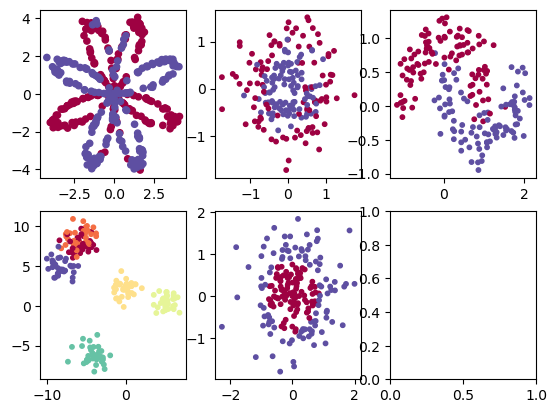

In [3]:
fig, ax = plt.subplots(2,3)
ax[0,0].scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
ax[0,1].scatter(X2[:, 0], X2[:, 1], c=Y2, s=10, cmap=plt.cm.Spectral)
ax[0,2].scatter(X3[:, 0], X3[:, 1], c=Y3, s=10, cmap=plt.cm.Spectral)
ax[1,0].scatter(X4[:, 0], X4[:, 1], c=Y4, s=10, cmap=plt.cm.Spectral)
ax[1,1].scatter(X5[:, 0], X5[:, 1], c=Y5, s=10, cmap=plt.cm.Spectral)

# plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [4]:
print("The shape of dataset X2 and Y2 is: ",X2.shape, Y2.shape) # => shape= (200,2) (200,1)
m2 = X2.shape[0]
print("The shape of dataset X3 and Y3 is: ",X3.shape, Y3.shape) # => shape= (200,2) (200,1)
m3 = X3.shape[0]
print("The shape of dataset X4 and Y4 is: ",X4.shape, Y4.shape) # => shape= (200,2) (200,1)
m4 = X4.shape[0]

The shape of dataset X2 and Y2 is:  (200, 2) (200,)
The shape of dataset X3 and Y3 is:  (200, 2) (200,)
The shape of dataset X4 and Y4 is:  (200, 2) (200,)


In [5]:
Y2 = Y2.reshape((200,1))
Y3 = Y3.reshape((200,1))
Y4 = Y4.reshape((200,1))
Y5 = Y5.reshape((200,1))

In [6]:
def layer_size(X,Y):
    # note-> X-- size(num. of examples, input size)
    # Y-- size(num. of examples, input size)
    n_x = X.shape[0]
    n_h = 5
    n_y = Y.shape[0]

    return (n_x, n_h, n_y)

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters


def sigmoid(X):
    s = 1/(1+np.exp(-X))
    return s

In [8]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}
    
    return A2, cache

In [9]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(Y,np.log(A2))+np.multiply(1-Y,np.log(1-A2))
    cost = -(1/m)*np.sum(logprobs)
    cost = float(np.squeeze(cost))
    return cost

In [10]:
def back_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2, A1.T) 
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dZ1":dZ1,
             "dW1":dW1,
             "db1":db1,
             "dZ2":dZ2,
             "dW2":dW2,
             "db2":db2}
    
    return grads

In [11]:
def update_parameters(parameters, grads, learning_rate):
    W1 = copy.deepcopy(parameters["W1"])
    b1 = parameters["b1"]
    W2 = copy.deepcopy(parameters["W2"])
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    W2 = W2 - learning_rate*dW2
    b1 = b1 - learning_rate*db1
    b2 = b2 - learning_rate*db2

    parameters = {"W1": W1,
                  "W2": W2,
                  "b1": b1,
                  "b2": b2}
    
    return parameters

In [12]:
def nn_model(X, Y, n_h, num_iter=2000, print_cost=True):
    np.random.seed(3)
    n_x = layer_size(X, Y)[0]
    n_y = layer_size(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iter):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = back_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=1.2)

        if print_cost and (i%1000==0):
            print("Cost after iteration %i: %f"%(i, cost))

    return parameters

In [13]:
def predict(parameters, X):
    # W1 = parameters["W1"]
    # b1 = parameters["b1"]
    # W2 = parameters["W2"]
    # b2 = parameters["b2"]

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)

    return predictions

Cost after iteration 0: 0.693082
Cost after iteration 1000: 0.253948
Cost after iteration 2000: 0.203718
Cost after iteration 3000: 0.189425
Cost after iteration 4000: 0.182764
Cost after iteration 5000: 0.178443
Cost after iteration 6000: 0.179181
Cost after iteration 7000: 0.177457
Cost after iteration 8000: 0.176116
Cost after iteration 9000: 0.175056
Cost after iteration 10000: 0.174199
Cost after iteration 11000: 0.173489
Cost after iteration 12000: 0.172887
Cost after iteration 13000: 0.172366


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 5')

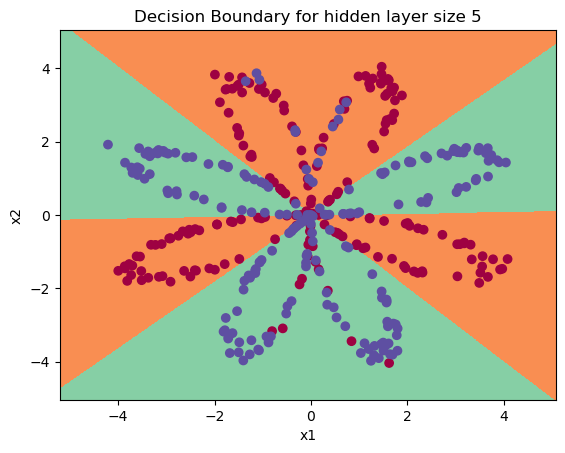

In [14]:
parameters = nn_model(X, Y, 5, num_iter=13002, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(5))

In [15]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 91%


Cost after iteration 0: 0.693142
Cost after iteration 1000: 0.375851
Cost after iteration 2000: 0.379450
Cost after iteration 3000: 0.376070
Cost after iteration 4000: 0.372736
Cost after iteration 5000: 0.364536
Cost after iteration 6000: 0.359580
Cost after iteration 7000: 0.346820
Cost after iteration 8000: 0.320862
Cost after iteration 9000: 0.309649
Cost after iteration 10000: 0.301520
Cost after iteration 11000: 0.295560
Cost after iteration 12000: 0.285002
Cost after iteration 13000: 0.274116
Cost after iteration 14000: 0.268419


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 15')

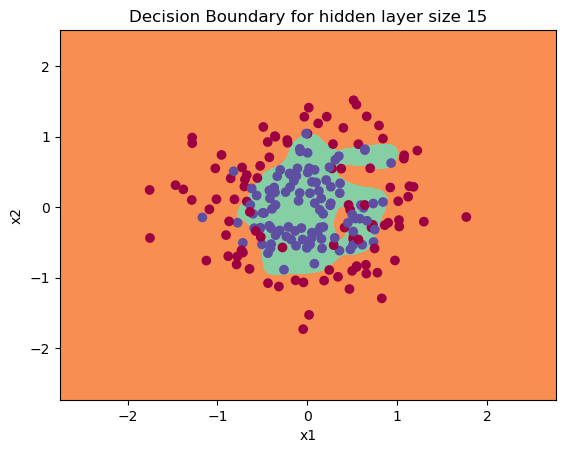

In [25]:
parameters2 = nn_model(X2.T, Y2.T, 15, num_iter=15000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters2, x.T), X2.T, Y2.T)
plt.title("Decision Boundary for hidden layer size " + str(15))

In [26]:
predictions = predict(parameters2, X2.T)
print ('Accuracy: %d' % float((np.dot(Y2.T, predictions.T) + np.dot(1 - Y2.T, 1 - predictions.T)) / float(Y2.T.size) * 100) + '%')

Accuracy: 88%


Cost after iteration 0: 0.693140
Cost after iteration 1000: 0.217685
Cost after iteration 2000: 0.109847
Cost after iteration 3000: 0.101897
Cost after iteration 4000: 0.097634
Cost after iteration 5000: 0.093636
Cost after iteration 6000: 0.090316
Cost after iteration 7000: 0.087775
Cost after iteration 8000: 0.085847
Cost after iteration 9000: 0.084293
Cost after iteration 10000: 0.082989
Cost after iteration 11000: 0.081918
Cost after iteration 12000: 0.080994


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 5')

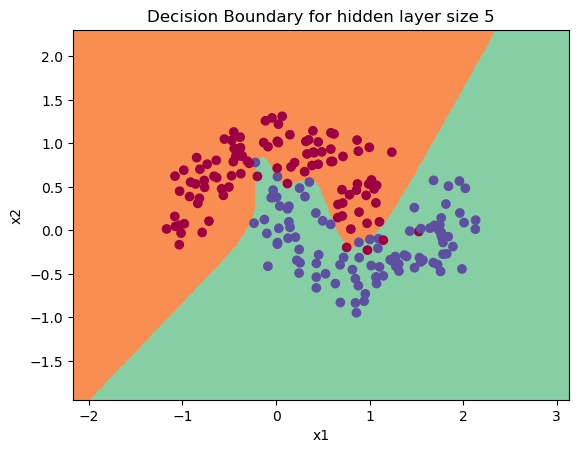

In [18]:
parameters3 = nn_model(X3.T, Y3.T, 5, num_iter=13000, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters3, x.T), X3.T, Y3.T)
plt.title("Decision Boundary for hidden layer size " + str(5))

In [19]:
predictions = predict(parameters3, X3.T)
print ('Accuracy: %d' % float((np.dot(Y3.T, predictions.T) + np.dot(1 - Y3.T, 1 - predictions.T)) / float(Y3.T.size) * 100) + '%')

Accuracy: 95%


Cost after iteration 0: 0.693161
Cost after iteration 1000: 0.096772
Cost after iteration 2000: 0.111145
Cost after iteration 3000: 0.111131
Cost after iteration 4000: 0.109606
Cost after iteration 5000: 0.107502
Cost after iteration 6000: 0.068596


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 5')

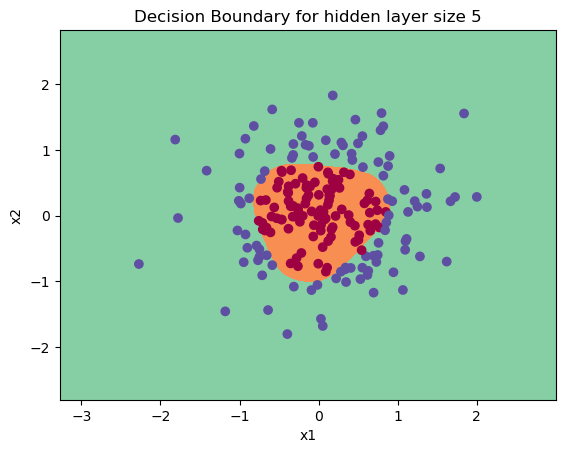

In [20]:
parameters5 = nn_model(X5.T, Y5.T, 5, num_iter=6003, print_cost=True)

plot_decision_boundary(lambda x: predict(parameters5, x.T), X5.T, Y5.T)
plt.title("Decision Boundary for hidden layer size " + str(5))

In [21]:
predictions = predict(parameters5, X5.T)
print ('Accuracy: %d' % float((np.dot(Y5.T, predictions.T) + np.dot(1 - Y5.T, 1 - predictions.T)) / float(Y5.T.size) * 100) + '%')

Accuracy: 98%
